<a href="https://colab.research.google.com/github/EnFiore/ai-machine-learning-modelli-e-algoritmi/blob/main/6%20-%20Nearest%20Neighbors/nearest_neighbors_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Recognition
In questa esercitazione dovrai addestrare un sistema di face recognition, in grado di riconoscere 40 differenti persone. Per farlo puoi utilizzare l'Olivetti Faces Dataset scaricabile [da qui](https://github.com/ProfAI/machine-learning-modelli-e-algoritmi/raw/main/datasets/olivetti_faces.zip) e un algoritmo Nearest Neighbors, l'accuracy del modello deve essere almeno del 80%. Quale tra le 40 persone ti somiglia di più?



In [ ]:
#recupero il dataset e lo si spacchetta
#il pacchetto zip ha varie cartelal ciascuna con 10 immagini del volto
!wget https://github.com/ProfAI/machine-learning-modelli-e-algoritmi/raw/main/datasets/olivetti_faces.zip
!unzip -o olivetti_faces.zip -d olivetti_faces

--2025-10-21 13:46:24--  https://github.com/ProfAI/machine-learning-modelli-e-algoritmi/raw/main/datasets/olivetti_faces.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/olivetti_faces.zip [following]
--2025-10-21 13:46:25--  https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/olivetti_faces.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 912321 (891K) [application/zip]
Saving to: ‘olivetti_faces.zip.3’

olivetti_faces.zip. 100%[===================>] 890.94K  5.28MB/s    in 0.2s    

2025-1

In [ ]:
#!rm -r olivetti_faces

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from os import listdir
import cv2 #libreria per visualizare le immagini

si imposta risoluzione immagini

In [ ]:
RANDOM_SEED = 0
img_size = (64, 64)

immagine in

In [ ]:
FOLDER = "olivetti_faces"

X = [] #array con immagine
y = [] #label dell'immagine

#si itera sulle cartelle e si estraggono le immagini
for dir in listdir(FOLDER):
  path = FOLDER+"/"+dir+"/"
  for f in sorted(listdir(path)): #f è l'immagina si indica sorted per mantenere inalterato l'ordine delle immagini
    if ".jpg" in f:
      x = cv2.imread(path+f, cv2.IMREAD_GRAYSCALE) #si indica path dell'immagine e gli si indica che l'immaigne è in bianco e nero
      X.append(x)
      y.append(dir)

X = np.array(X)
y = np.array(y)

X.shape

(400, 64, 64)

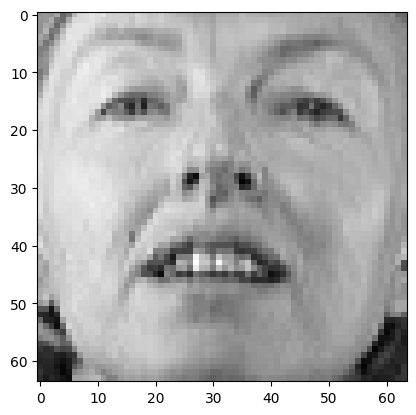

In [ ]:

plt.imshow(X[0], cmap="gray")

In [ ]:
#l'immagine che è una matrice viene messa come array numpy
#si fa un reshape
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
X.shape

(400, 4096)

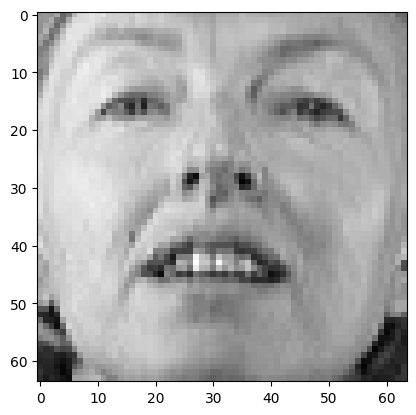

In [ ]:
#trasformazione inversa per verifica di non aver rovinato l'immagine
plt.imshow(X[0].reshape(img_size[0], img_size[1]), cmap="gray")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

In [ ]:
#normaliziamo i valori, prendendo il valore massimo dei pixel
X_train = X_train/255
X_test = X_test/255

In [ ]:
#si verifica se y_tst ha le stesse classi presenti in y_tain
#1- trasforma i true in false
(1-np.isin(y_test, y_train)).sum()

np.int64(0)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test, y_test)

0.8625

In [ ]:
#proviamo il modello vedendo a quale foto l'immagine assomiglia
#l'immagine deve avere dimensioni uguali a quelle delle immagini uste per il training 64x64
x = cv2.imread("me.jpg", cv2.IMREAD_GRAYSCALE)
x = cv2.resize(x, img_size)
plt.imshow(x, cmap="gray")

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
x = x.reshape(img_size[0]*img_size[1])
x = x/255

In [ ]:
x.shape

(4096,)

In [ ]:
y_pred = knn.predict([x])
y_pred

array(['20'], dtype='<U2')

In [ ]:
#verifico le probabilità associate alle 40 persone
y_proba = knn.predict_proba([x])[0]

for i in range(y_proba.shape[0]):
  print(f"Person {knn.classes_[i]} = {y_proba[i]} probability") #classes recupera la classe relativa all'indice

Person 0 = 0.0 probability
Person 1 = 0.0 probability
Person 10 = 0.0 probability
Person 11 = 0.0 probability
Person 12 = 0.0 probability
Person 13 = 0.0 probability
Person 14 = 0.0 probability
Person 15 = 0.0 probability
Person 16 = 0.0 probability
Person 17 = 0.0 probability
Person 18 = 0.0 probability
Person 19 = 0.0 probability
Person 2 = 0.0 probability
Person 20 = 0.4 probability
Person 21 = 0.0 probability
Person 22 = 0.0 probability
Person 23 = 0.0 probability
Person 24 = 0.0 probability
Person 25 = 0.4 probability
Person 26 = 0.0 probability
Person 27 = 0.0 probability
Person 28 = 0.0 probability
Person 29 = 0.2 probability
Person 3 = 0.0 probability
Person 30 = 0.0 probability
Person 31 = 0.0 probability
Person 32 = 0.0 probability
Person 33 = 0.0 probability
Person 34 = 0.0 probability
Person 35 = 0.0 probability
Person 36 = 0.0 probability
Person 37 = 0.0 probability
Person 38 = 0.0 probability
Person 39 = 0.0 probability
Person 4 = 0.0 probability
Person 5 = 0.0 probabilit